# Import Module

In [3]:
# Module pengolahan data
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.utils import resample 
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from time import time
import itertools
import warnings
warnings.filterwarnings('ignore')

# Module modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Module visualisasi data
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

# Module evaluasi
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report, confusion_matrix, roc_auc_score, average_precision_score

# Module save model
import joblib
import pickle

# Load Dataset

In [4]:
# Load Dataset
df = pd.read_csv('/content/hr_data.csv')
df.head()

,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Offered band,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,Gender,Candidate Source,Rex in Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


Keterangan:
- Candidate Ref : Nomor referensi unik untuk mengidentifikasi kandidat
- DOJ Extended : (Date of Joining) Tanggal untuk bergabung diminta oleh kandidat atau tidak
- Duration to accept the offer : Jumlah hari yang diambil oleh kandidat untuk menerima penawaran
- Notice period : Periode pemberitahuan dilayani sebelum kandidat dapat bergabung dengan perusahaan
- Offered band : Band yang ditawarkan kepada kandidat berdasarkan pengalaman dan kinerja
- Percent hike expected in CTC : Persentase kenaikan yang diharapkan oleh kandidat (Cost to Company = Gaji Kotor + Tunjangan per tahun)
- Percent hike offered in CTC : Persentase kenaikan yang ditawarkan oleh perusahaan (Cost to Company)
- Percent difference CTC : Selisih antara kenaikan yang diharapkan dan yang ditawarkan (Cost to Company)
- Joining Bonus : Bonus bergabung adalah diberikan atau tidak
- Candidate relocate actual : Kandidat harus pindah atau tidak
- Gender : Gender dari kandidat
- Candidate Source : Sumber dari mana resume kandidat diperoleh
- Rex in Yrs : Tahun pengalaman yang relevan kandidat
- LOB : Bidang bisnis tempat penawaran diluncurkan (Line of business)
- Location : Lokasi perusahaan tempat penawaran diluncurkan
- Age : Usia kandidat
- Status : Target variabel apakah kandidat bergabung atau tidak

# Data Understanding

In [5]:
# Memeriksa jumlah baris dan kolom dataset
df.shape

(8995, 18)

In [6]:
# Memeriksa informasi dari kolom numerik dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SLNO,8995.0,5.970984e+03,3373.963454,1.00,3207.50,5976.0,8739.00,12333.00
Candidate Ref,8995.0,2.843647e+06,486344.774552,2109586.00,2386476.00,2807482.0,3300059.50,3836076.00
Duration to accept offer,8995.0,2.143446e+01,25.811616,0.00,3.00,10.0,33.00,224.00
Notice period,8995.0,3.929183e+01,22.220239,0.00,30.00,30.0,60.00,120.00
Pecent hike expected in CTC,8995.0,4.386480e+01,29.788975,-68.83,27.27,40.0,53.85,359.77
Percent hike offered in CTC,8995.0,4.065736e+01,36.064060,-60.53,22.09,36.0,50.00,471.43
Percent difference CTC,8995.0,-1.573802e+00,19.610729,-67.27,-8.33,0.0,0.00,300.00
Rex in Yrs,8995.0,4.239022e+00,2.547571,0.00,3.00,4.0,6.00,24.00
Age,8995.0,2.991317e+01,4.097912,20.00,27.00,29.0,34.00,60.00


In [7]:
# Menampilkan seluruh informasi dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8995 non-null   int64  
 4   Notice period                8995 non-null   int64  
 5   Offered band                 8995 non-null   object 
 6   Pecent hike expected in CTC  8995 non-null   float64
 7   Percent hike offered in CTC  8995 non-null   float64
 8   Percent difference CTC       8995 non-null   float64
 9   Joining Bonus                8995 non-null   object 
 10  Candidate relocate actual    8995 non-null   object 
 11  Gender                       8995 non-null   object 
 12  Candidate Source             8995 non-null   object 
 13  Rex in Yrs        

In [8]:
# Memeriksa null value pada dataset
df.isnull().sum()

SLNO                           0
Candidate Ref                  0
DOJ Extended                   0
Duration to accept offer       0
Notice period                  0
Offered band                   0
Pecent hike expected in CTC    0
Percent hike offered in CTC    0
Percent difference CTC         0
Joining Bonus                  0
Candidate relocate actual      0
Gender                         0
Candidate Source               0
Rex in Yrs                     0
LOB                            0
Location                       0
Age                            0
Status                         0
dtype: int64

In [9]:
# Memeriksa duplikasi data pada dataset
df.duplicated().sum()

0

# Exploratory Data Analysis

In [10]:
# Pembagian kolom numerik dan kategori
num_col = [col for col in df.columns if df[col].dtypes in ['int64','float64']]
cat_col = [col for col in df.columns if df[col].dtypes == 'object']

print("Numerical columns: \n", num_col, "\n")
print('Categorical columns: \n', cat_col, "\n")

Numerical columns: 
 ['SLNO', 'Candidate Ref', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age'] 

Categorical columns: 
 ['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status'] 



In [11]:
# Menampilkan unique value pada kolom kategori
print(df['DOJ Extended'].unique(), "\n")
print(df['Offered band'].unique(), "\n")
print(df['Joining Bonus'].unique(), "\n")
print(df['Candidate relocate actual'].unique(), "\n")
print(df['Gender'].unique(), "\n")
print(df['Candidate Source'].unique(), "\n")
print(df['LOB'].unique(), "\n")
print(df['Location'].unique(), "\n")
print(df['Status'].unique(), "\n")

['Yes' 'No'] 

['E2' 'E1' 'E3' 'E0'] 

['No' 'Yes'] 

['No' 'Yes'] 

['Female' 'Male'] 

['Agency' 'Employee Referral' 'Direct'] 

['ERS' 'INFRA' 'Healthcare' 'BFSI' 'CSMP' 'ETS' 'AXON' 'EAS' 'MMS'] 

['Noida' 'Chennai' 'Gurgaon' 'Bangalore' 'Hyderabad' 'Kolkata' 'Cochin'
 'Pune' 'Others' 'Mumbai' 'Ahmedabad'] 

['Joined' 'Not Joined'] 



In [12]:
# Menampilkan unique value pada kolom numerik
print(df['SLNO'].unique(), "\n")
print(df['Candidate Ref'].unique(), "\n")
print(df['Duration to accept offer'].unique(), "\n")
print(df['Notice period'].unique(), "\n")
print(df['Pecent hike expected in CTC'].unique(), "\n")
print(df['Percent hike offered in CTC'].unique(), "\n")
print(df['Percent difference CTC'].unique(), "\n")
print(df['Rex in Yrs'].unique(), "\n")
print(df['Age'].unique(), "\n")

[    1     2     3 ... 12331 12332 12333] 

[2110407 2112635 2112838 ... 3834159 3835433 3836076] 

[ 14  18   3  26   1  17  37  16   6 120  44   7  98   0  83  32  19   4
  38  24  10  53   5  46   2  31  54  33 105  69  68  84  28 126 106  90
  21  36  34  20  13   8  42  12 103  43  60  23  67  15  45  25  47  11
  48  74  30  40  35  58  29  86  51  50  39  57  93  55  71  56  66  62
   9  64 107  27  78  22  49  92  61  79  77 108  70  82 210  80  97  41
  59  88  99  63 111  87  95  52  96  91 101  65 140  76  73 123 104  72
 117 109  89 127  81  85  75 118 114 110 129 124 116 181  94 121 119 102
 113 115 125 131 100 130 224 143 122 163] 

[ 30  45 120   0  75  60  90] 

[-20.79  50.    42.84 ...  45.52   6.15  96.85] 

[ 13.16 320.    42.84 ...   0.77  35.2   45.52] 

[ 42.86 180.     0.   ...  43.75  18.   -21.45] 

[ 7  8  4  6  2  3  5 18  1 13 15 20 10  9  0 11 16 12 14 24 17 22] 

[34 27 32 26 29 36 30 31 40 28 33 25 44 23 41 20 37 24 35 50 42 38 39 21
 45 46 43 22 49 47 4

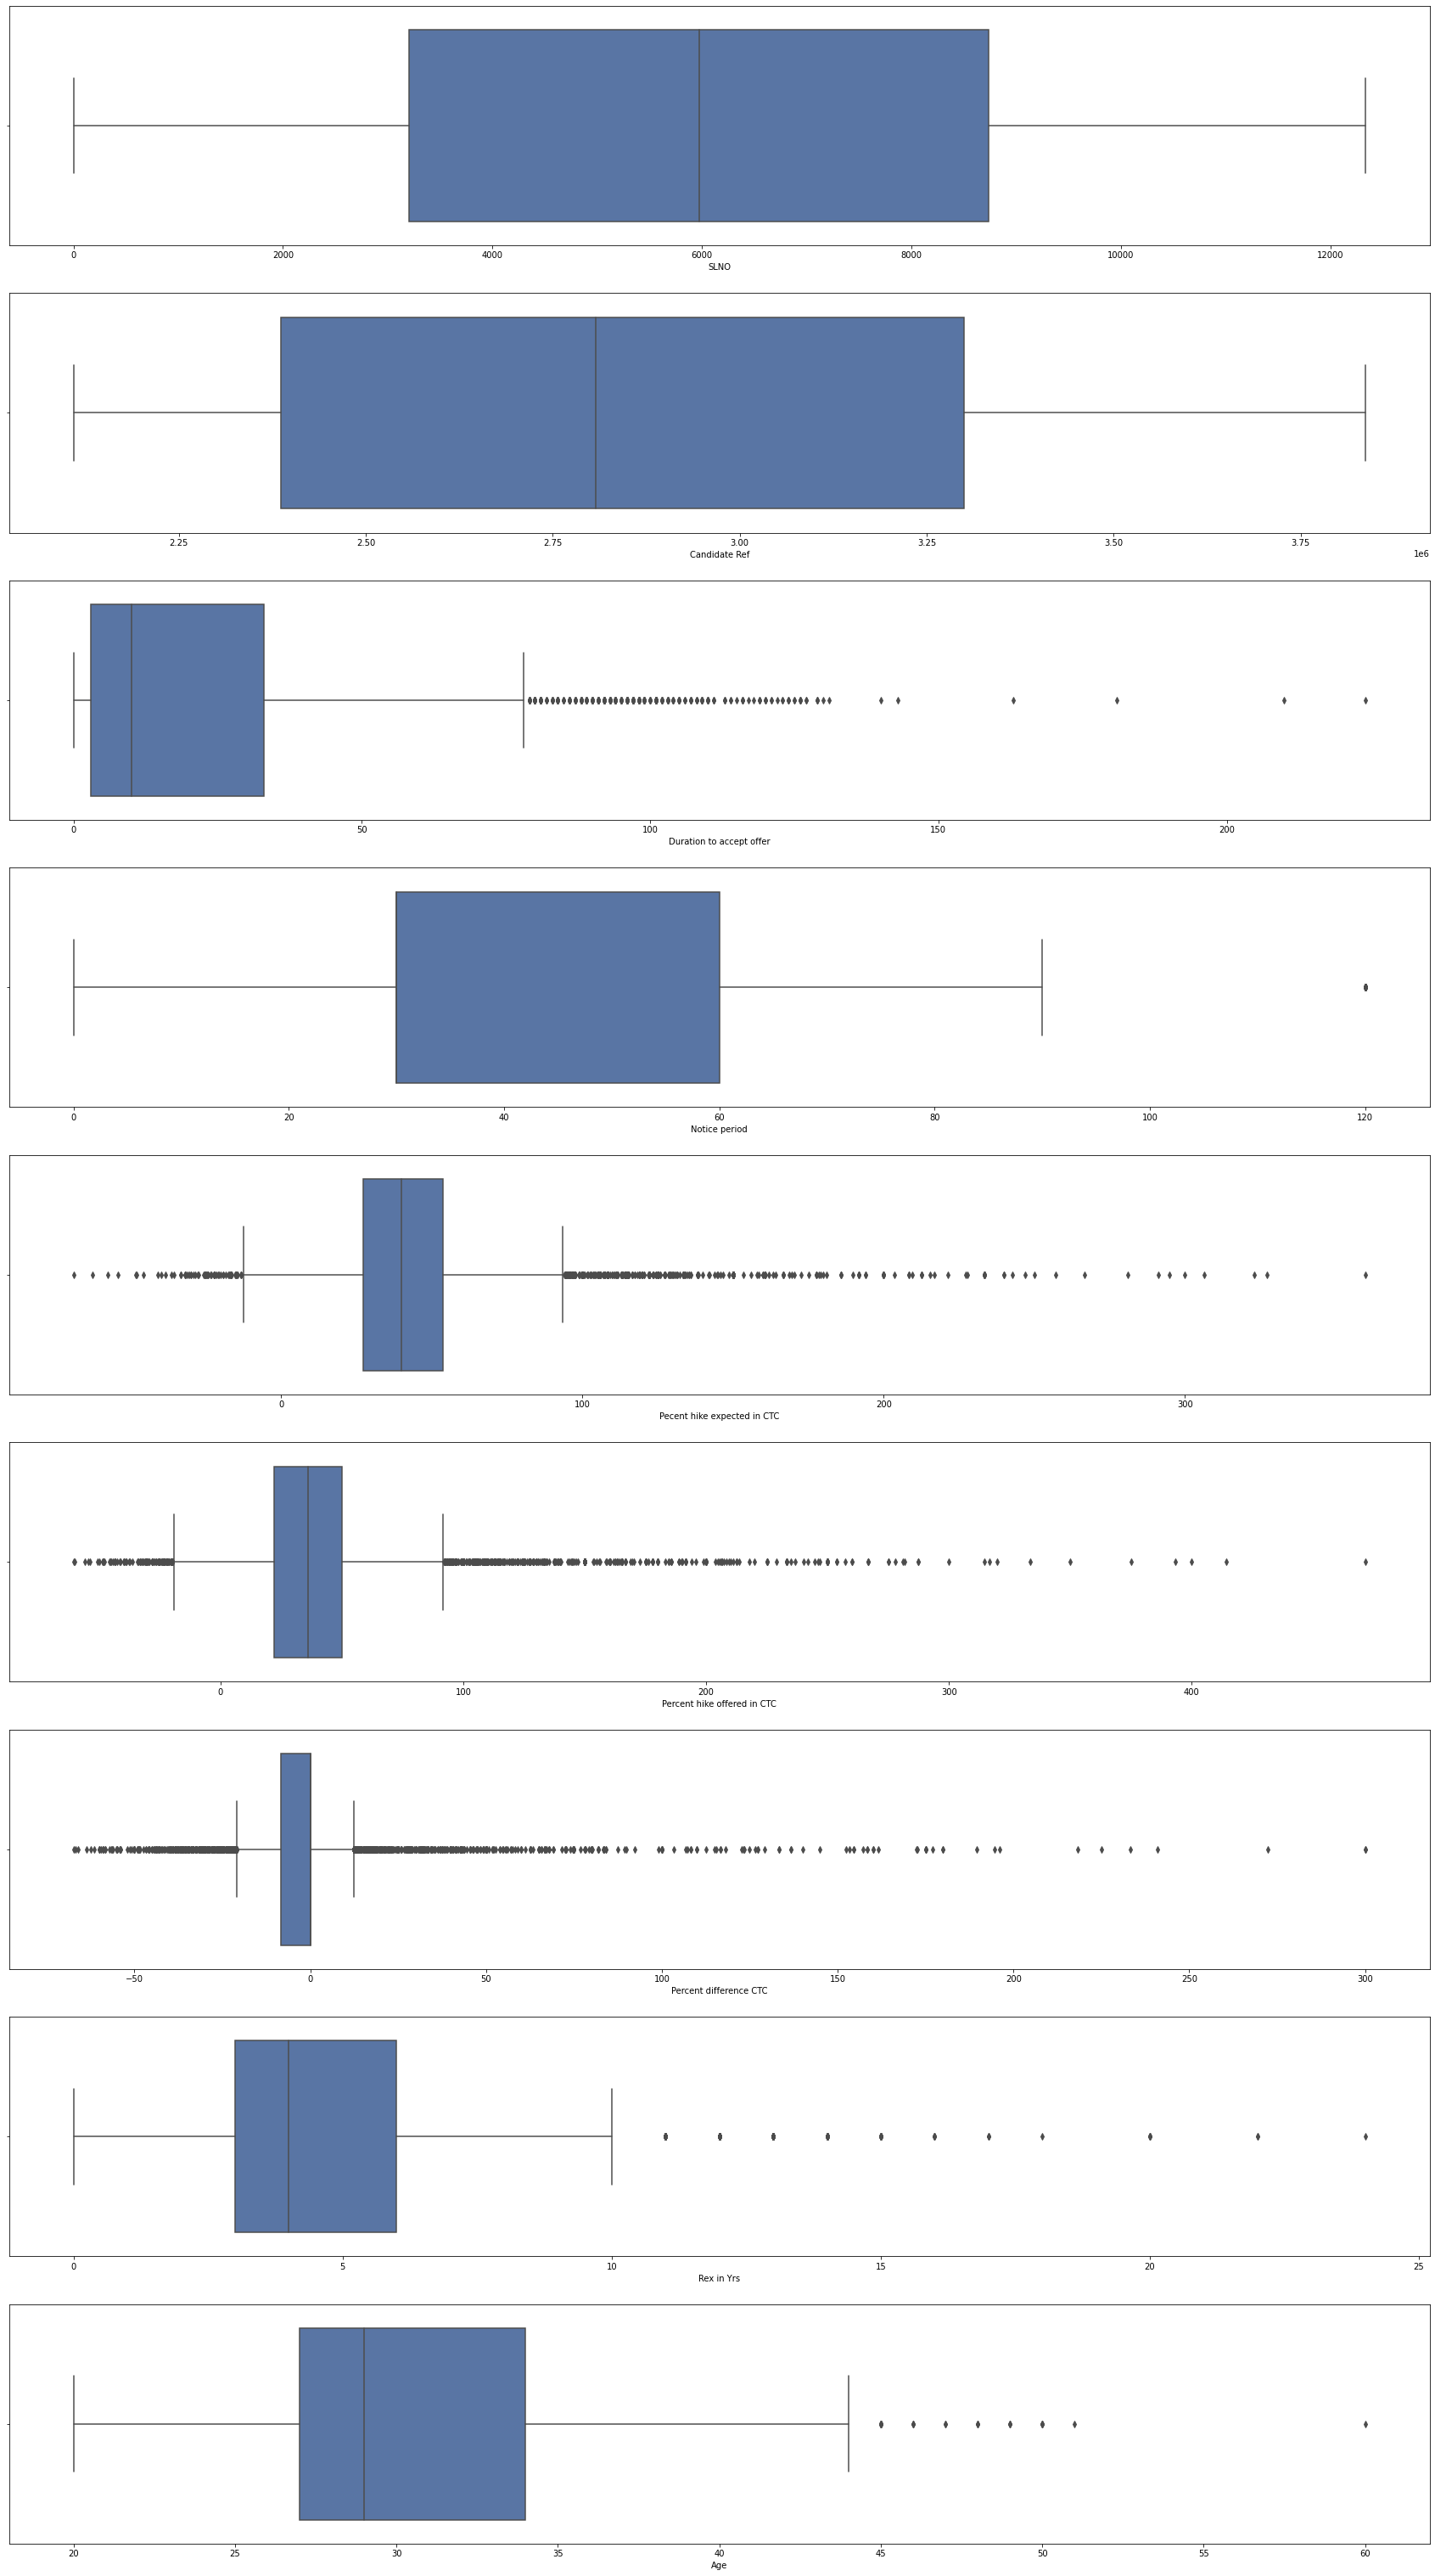

In [13]:
# Visualisasi box plot pada kolom numerik
fig, ax = plt.subplots(9, figsize=(30, 55))
sns.set(font_scale=2)
g=sns.boxplot(data=df, x="SLNO", ax=ax[0])
g=sns.boxplot(data=df, x="Candidate Ref", ax=ax[1])
g=sns.boxplot(data=df, x="Duration to accept offer", ax=ax[2])
g=sns.boxplot(data=df, x="Notice period", ax=ax[3])
g=sns.boxplot(data=df, x="Pecent hike expected in CTC", ax=ax[4])
g=sns.boxplot(data=df, x="Percent hike offered in CTC", ax=ax[5])
g=sns.boxplot(data=df, x="Percent difference CTC", ax=ax[6])
g=sns.boxplot(data=df, x="Rex in Yrs", ax=ax[7])
g=sns.boxplot(data=df, x="Age", ax=ax[8])

            jumlah sampel  persentase
Joined               7313        81.3
Not Joined           1682        18.7


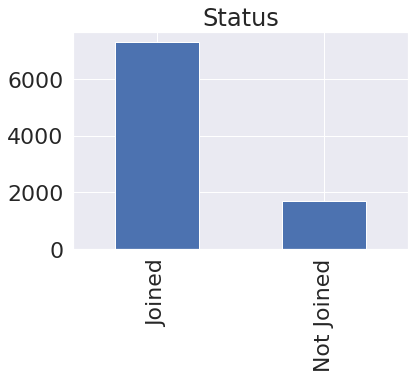

In [14]:
# Visualisasi bar chart pada kolom label/target
feature = cat_col[8]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df1 = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df1)
count.plot(kind='bar', title=feature);

# Data Preprocessing

In [15]:
# Menghapus outlier menggunakan IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print("Old Shape: ", df.shape)
df = df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print("New Shape: ", df.shape)

Old Shape:  (8995, 18)
New Shape:  (6769, 18)


In [16]:
# Q1 = df['Duration to accept offer'].quantile(0.25)
# Q3 = df['Duration to accept offer'].quantile(0.75)
# IQR = Q3 - Q1
# lower_accept = Q1 - 1.5 * IQR
# upper_accept = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_accept, upper_accept))
# from scipy.stats.mstats import winsorize
# df['Duration to accept offer'] = winsorize(df['Duration to accept offer'], (0.05, 0.05))
# sns.boxplot(df['Duration to accept offer'])

In [17]:
# Q1 = df['Notice period'].quantile(0.25)
# Q3 = df['Notice period'].quantile(0.75)
# IQR = Q3 - Q1
# lower_notice = Q1 - 1.5 * IQR
# upper_notice = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_notice, upper_notice))
# from scipy.stats.mstats import winsorize
# df['Notice period'] = winsorize(df['Notice period'], (0.05, 0.05))
# sns.boxplot(df['Notice period'])

In [18]:
# Q1 = df['Pecent hike expected in CTC'].quantile(0.25)
# Q3 = df['Pecent hike expected in CTC'].quantile(0.75)
# IQR = Q3 - Q1
# lower_expected = Q1 - 1.5 * IQR
# upper_expected = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_expected, upper_expected))
# from scipy.stats.mstats import winsorize
# df['Pecent hike expected in CTC'] = winsorize(df['Pecent hike expected in CTC'], (0.05, 0.05))
# sns.boxplot(df['Pecent hike expected in CTC'])

In [19]:
# Q1 = df['Percent hike offered in CTC'].quantile(0.25)
# Q3 = df['Percent hike offered in CTC'].quantile(0.75)
# IQR = Q3 - Q1
# lower_offered = Q1 - 1.5 * IQR
# upper_offered = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_offered, upper_offered))
# from scipy.stats.mstats import winsorize
# df['Percent hike offered in CTC'] = winsorize(df['Percent hike offered in CTC'], (0.05, 0.05))
# sns.boxplot(df['Percent hike offered in CTC'])

In [20]:
# Q1 = df['Percent difference CTC'].quantile(0.25)
# Q3 = df['Percent difference CTC'].quantile(0.75)
# IQR = Q3 - Q1
# lower_difference = Q1 - 1.5 * IQR
# upper_difference = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_difference, upper_difference))
# from scipy.stats.mstats import winsorize
# df['Percent difference CTC'] = winsorize(df['Percent difference CTC'], (0.05, 0.05))
# sns.boxplot(df['Percent difference CTC'])

In [21]:
# Q1 = df['Rex in Yrs'].quantile(0.25)
# Q3 = df['Rex in Yrs'].quantile(0.75)
# IQR = Q3 - Q1
# lower_rex = Q1 - 1.5 * IQR
# upper_rex = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_rex, upper_rex))
# from scipy.stats.mstats import winsorize
# df['Rex in Yrs'] = winsorize(df['Rex in Yrs'], (0.05, 0.05))
# sns.boxplot(df['Rex in Yrs'])

In [22]:
# Q1 = df['Age'].quantile(0.25)
# Q3 = df['Age'].quantile(0.75)
# IQR = Q3 - Q1
# lower_age = Q1 - 1.5 * IQR
# upper_age = Q3 + 1.5 * IQR
# print('Lower: {} dan Upper: {}'.format(lower_age, upper_age))
# from scipy.stats.mstats import winsorize
# df['Age'] = winsorize(df['Age'], (0.05, 0.05))
# sns.boxplot(df['Age'])

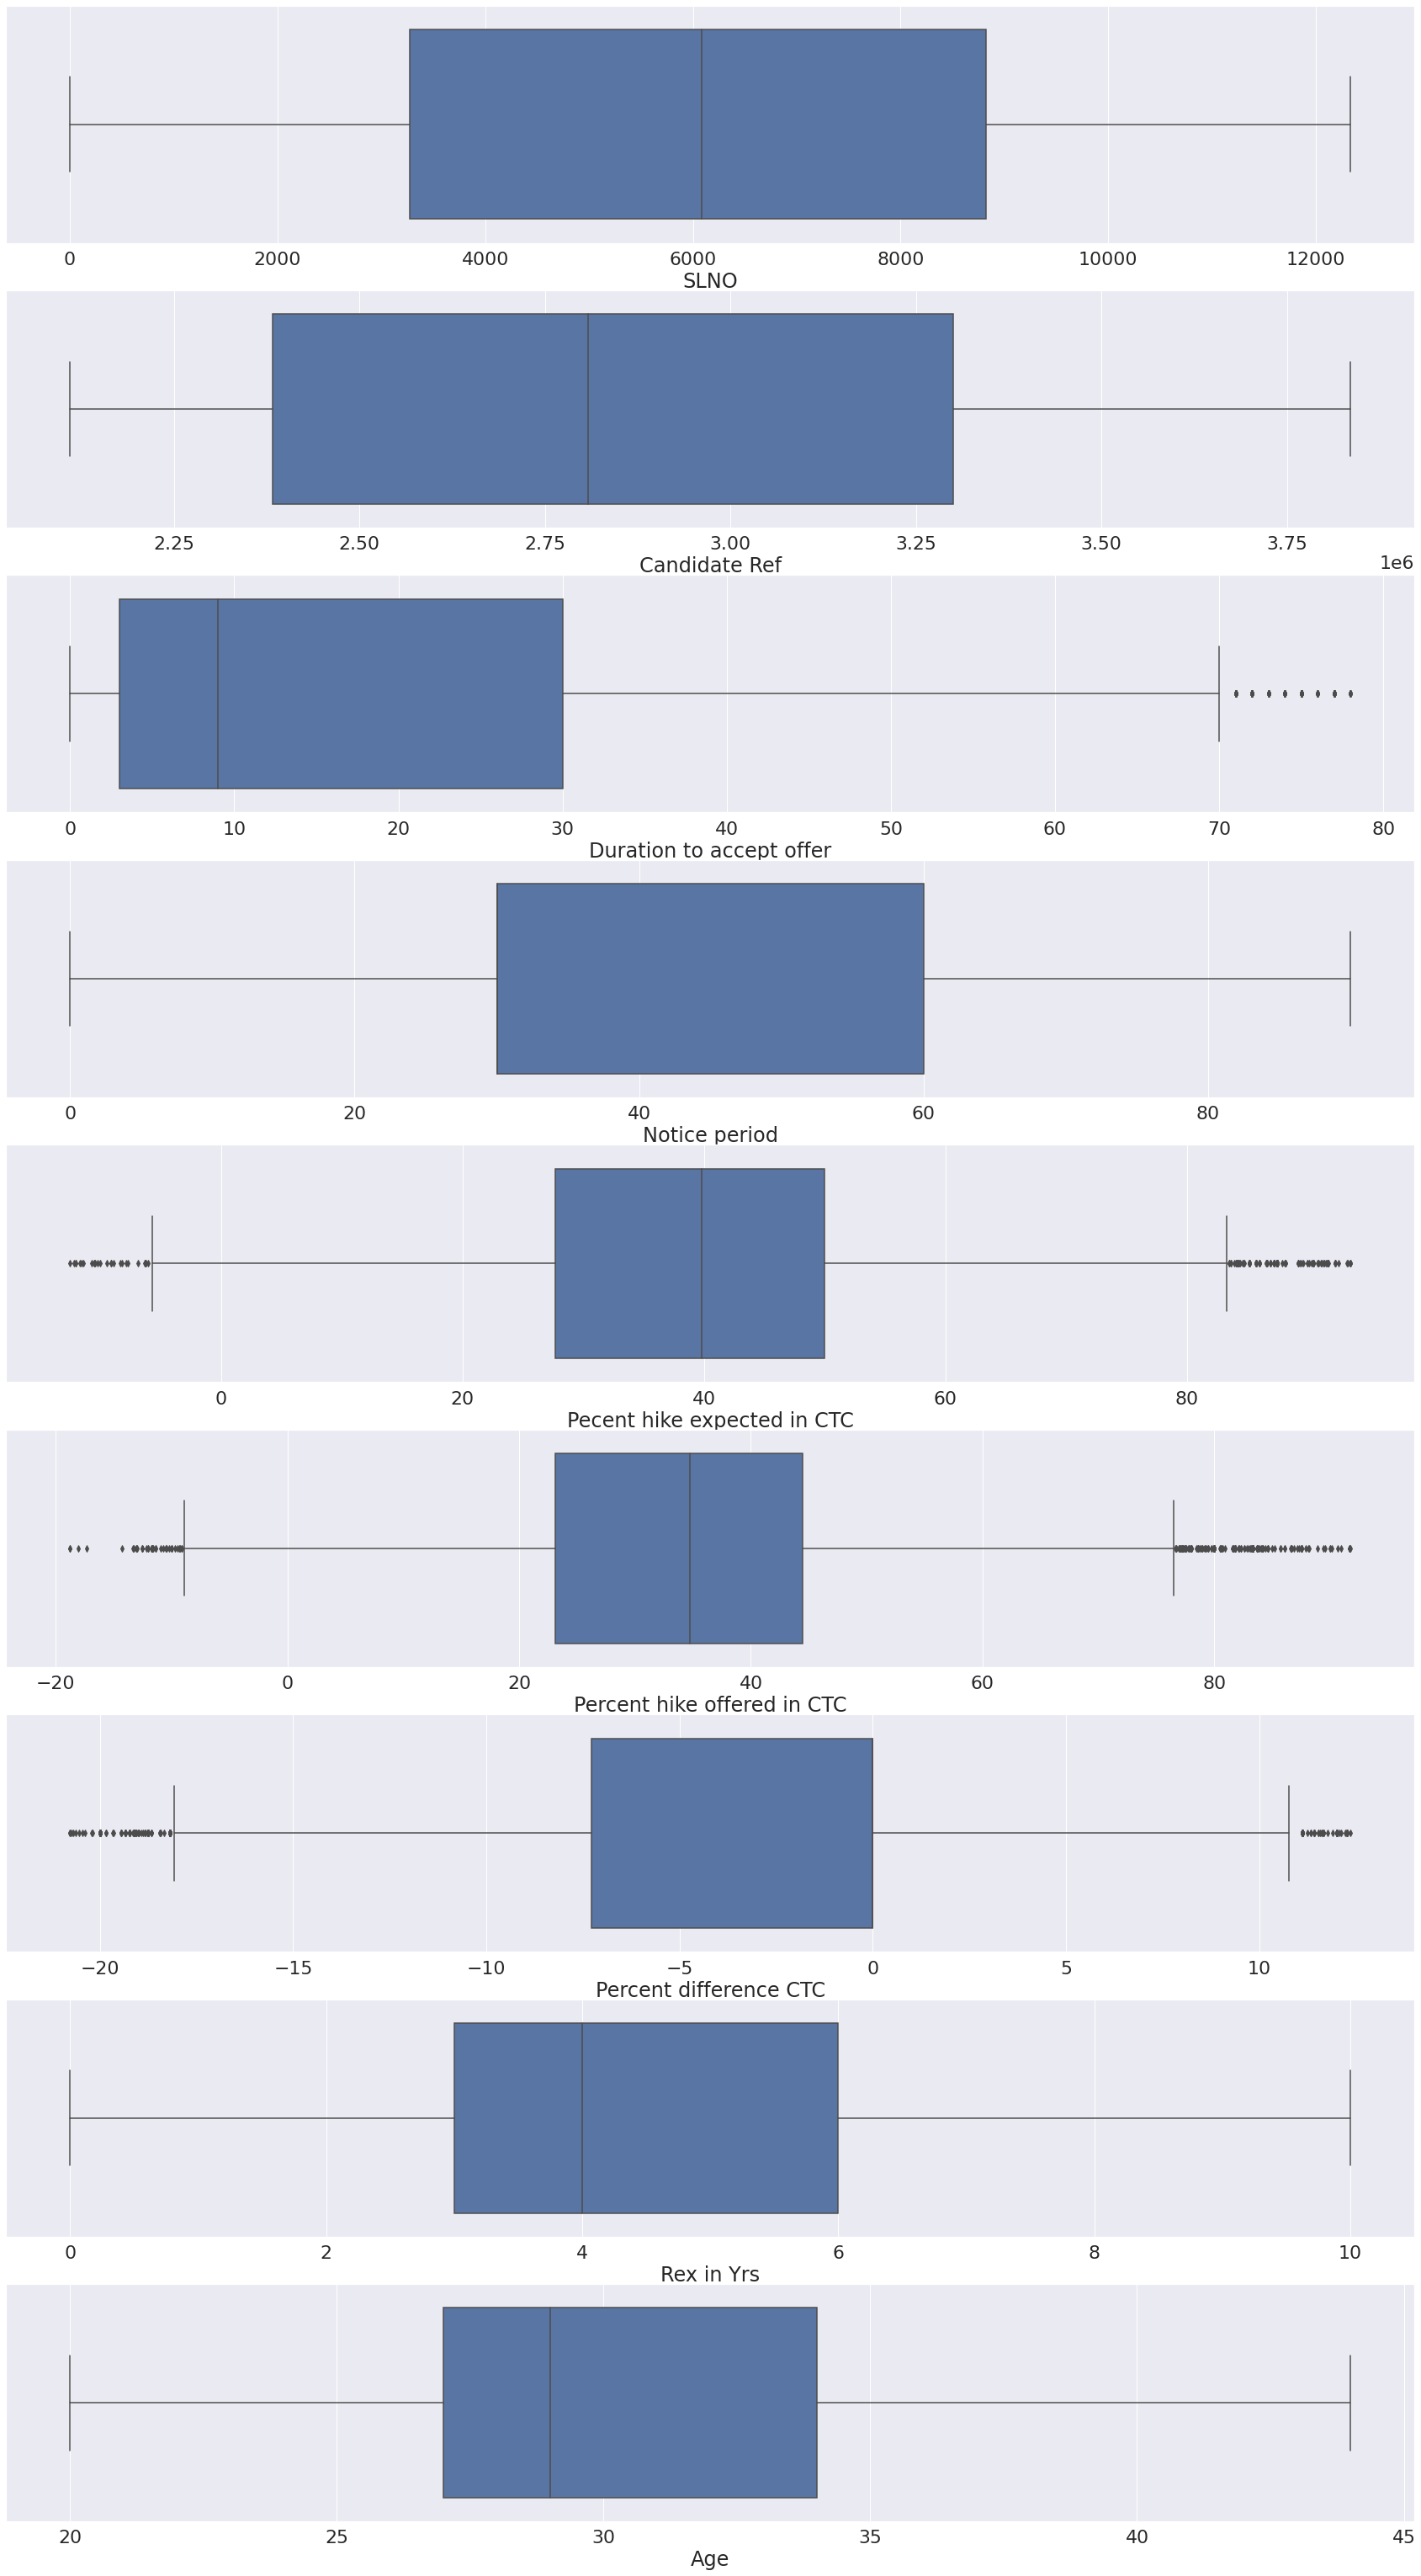

In [23]:
fig, ax = plt.subplots(9, figsize=(30, 55))
sns.set(font_scale=2)
g=sns.boxplot(data=df, x="SLNO", ax=ax[0])
g=sns.boxplot(data=df, x="Candidate Ref", ax=ax[1])
g=sns.boxplot(data=df, x="Duration to accept offer", ax=ax[2])
g=sns.boxplot(data=df, x="Notice period", ax=ax[3])
g=sns.boxplot(data=df, x="Pecent hike expected in CTC", ax=ax[4])
g=sns.boxplot(data=df, x="Percent hike offered in CTC", ax=ax[5])
g=sns.boxplot(data=df, x="Percent difference CTC", ax=ax[6])
g=sns.boxplot(data=df, x="Rex in Yrs", ax=ax[7])
g=sns.boxplot(data=df, x="Age", ax=ax[8])

In [24]:
# # Melakukan label encoder untuk setiap kolom kategori
# def object_to_int(dataframe_series):
#     if dataframe_series.dtype=='object':
#         dataframe_series = LabelEncoder().fit_transform(dataframe_series)
#     return dataframe_series

# df = df.apply(lambda x: object_to_int(x))
# df.head()

In [25]:
# Melakukan label encoding secara manual dengan memanfaatkan fuction map()

df['DOJ Extended'] = df['DOJ Extended'].map({'No':0, 
                                             'Yes':1})

df['Offered band'] = df['Offered band'].map({'E0':0, 
                                             'E1':1,
                                             'E2':2,
                                             'E3':3})

df['Joining Bonus'] = df['Joining Bonus'].map({'No':0, 
                                               'Yes':1})

df['Candidate relocate actual'] = df['Candidate relocate actual'].map({'No':0, 
                                                                       'Yes':1})

df['Gender'] = df['Gender'].map({'Female':0, 
                                 'Male':1})

df['Candidate Source'] = df['Candidate Source'].map({'Agency':0, 
                                                     'Direct':1,
                                                     'Employee Referral':2})

df['LOB'] = df['LOB'].map({'AXON':0, 
                           'BFSI':1,
                           'CSMP':2,
                           'EAS':3,
                           'ERS':4,
                           'ETS':5,
                           'Healthcare':6,
                           'INFRA':7,
                           'MMS':8})

df['Location'] = df['Location'].map({'Ahmedabad':0, 
                                     'Bangalore':1,
                                     'Chennai':2,
                                     'Cochin':3,
                                     'Gurgaon':4,
                                     'Hyderabad':5,
                                     'Kolkata':6,
                                     'Mumbai':7,
                                     'Noida':8,
                                     'Pune':9,
                                     'Others':10})

df['Status'] = df['Status'].map({'Not Joined':0, 
                                 'Joined':1})

In [26]:
# Menampilkan kembali unique value pada kolom kategori yang sudah dilakukan encoding
print(df['DOJ Extended'].unique(), "\n")
print(df['Offered band'].unique(), "\n")
print(df['Joining Bonus'].unique(), "\n")
print(df['Candidate relocate actual'].unique(), "\n")
print(df['Gender'].unique(), "\n")
print(df['Candidate Source'].unique(), "\n")
print(df['LOB'].unique(), "\n")
print(df['Location'].unique(), "\n")
print(df['Status'].unique(), "\n")

[0 1] 

[2 1 3 0] 

[0 1] 

[0 1] 

[1 0] 

[0 2 1] 

[7 4 1 0 2 5 3 6 8] 

[ 8  2  1  4  6  5  3  9 10  7  0] 

[1 0] 



Text(0.5, 1.0, 'Correlation Matrix')

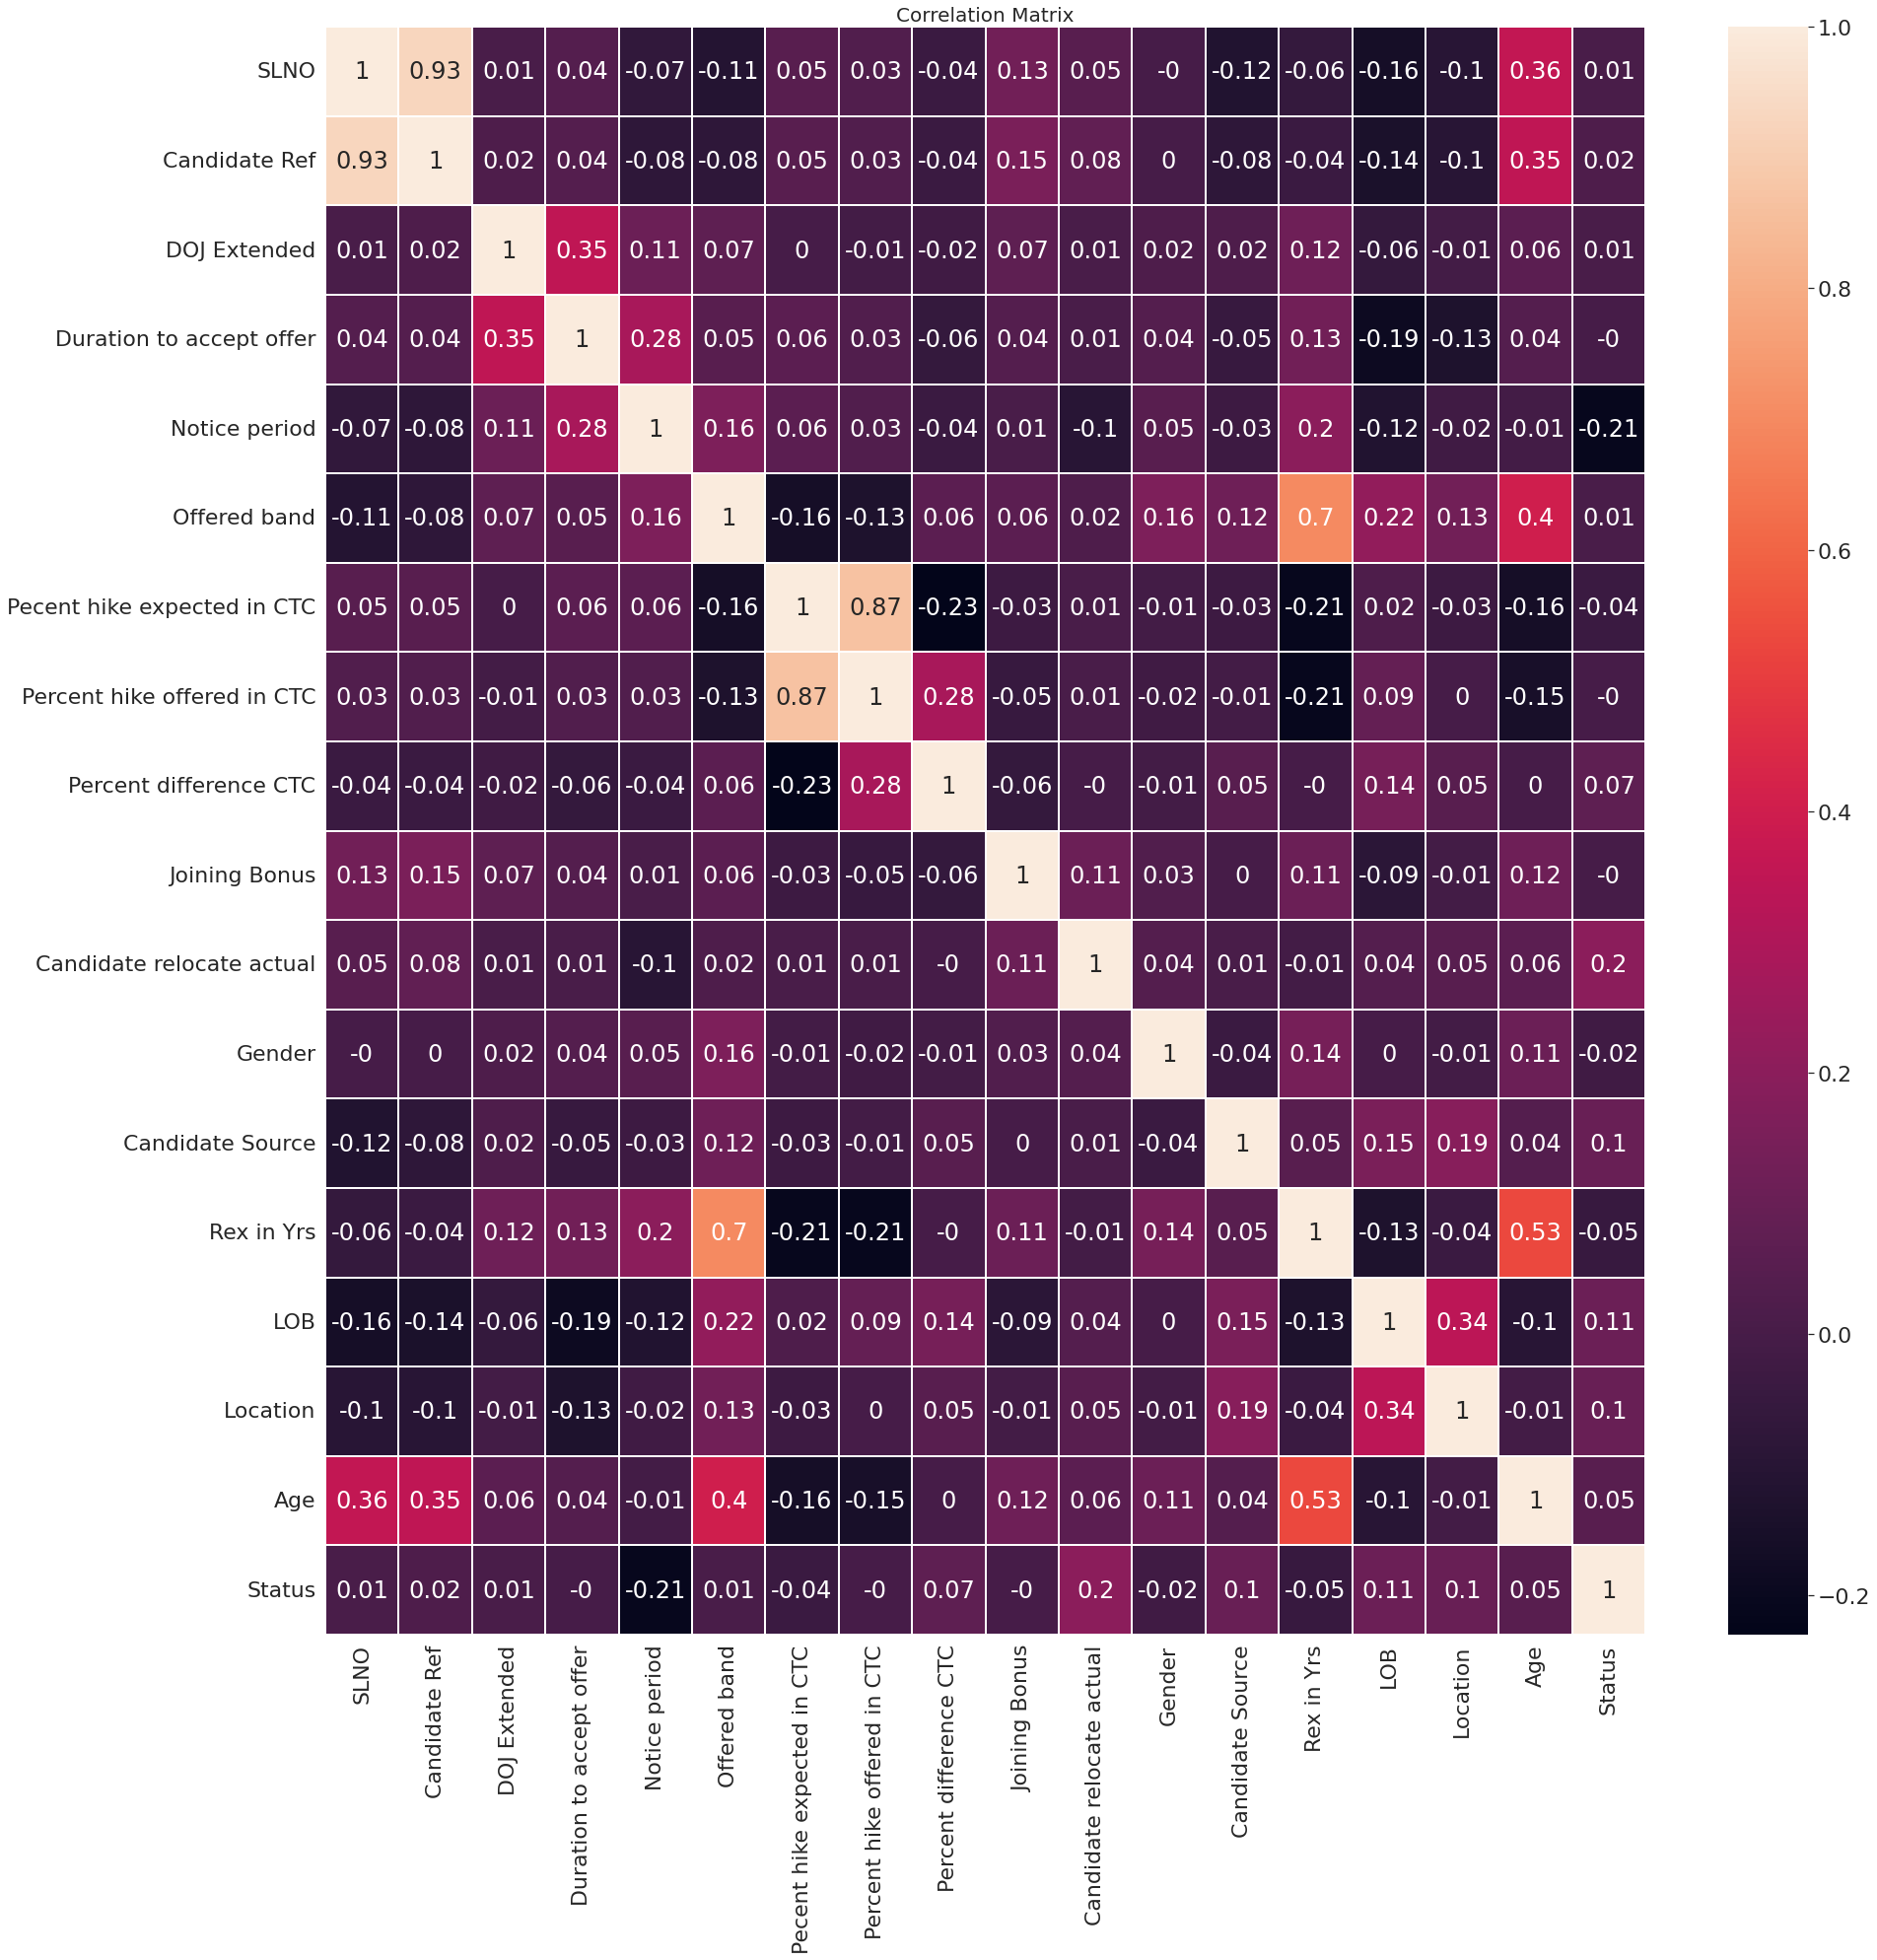

In [27]:
# Visualisasi heatmeap untuk menampilkan korelasi antara feature dengan label
plt.figure(figsize=(30, 30))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=1)
plt.title("Correlation Matrix", size=20)

In [28]:
# Menghapus kolom yang tidak digunakan
df = df.drop('SLNO', axis=1)
df = df.drop('Candidate Ref', axis=1)

In [29]:
# Memisahkan antara feature dengan label
X = df.drop(columns=['Status'])
y = df['Status'].values

sebelum resampling


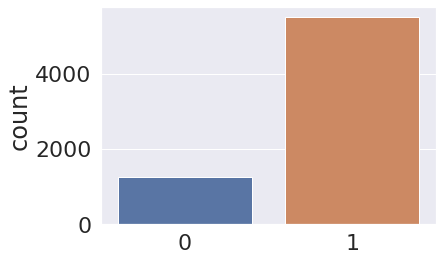

In [30]:
# Memeriksa jumlah data sebelum dilakukan resampling
print("sebelum resampling")
sns.countplot(y)

In [31]:
# Melakukan over sampling terhadap dataset
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X, y)

sesudah resampling


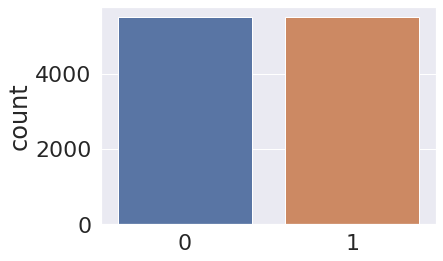

In [32]:
# Memeriksa jumlah data sesudah dilakukan resampling
print("sesudah resampling")
sns.countplot(y)

In [33]:
# Implementasi MinMaxScaler untuk menyamakan skala dari data
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[0.        , 0.03846154, 0.5       , ..., 0.875     , 0.8       ,
        0.29166667],
       [0.        , 0.33333333, 0.33333333, ..., 0.875     , 0.8       ,
        0.58333333],
       [1.        , 0.21794872, 0.33333333, ..., 0.875     , 0.8       ,
        0.58333333],
       ...,
       [0.        , 0.01282051, 0.33333333, ..., 0.625     , 0.7       ,
        0.25      ],
       [0.        , 0.15384615, 0.66666667, ..., 0.25      , 0.2       ,
        0.25      ],
       [1.        , 0.08974359, 0.33333333, ..., 0.375     , 0.8       ,
        0.20833333]])

In [34]:
# Melakukan split train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [35]:
# Memeriksa shape data training dan data testing 
print("X : ", X.shape)
print("y : ", y.shape, "\n")

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

X :  (11018, 15)
y :  (11018,) 

Train set: (8814, 15) (8814,)
Test set: (2204, 15) (2204,)


# Modeling Machine Learning

In [36]:
# Menyiapkan dataframe untuk analisis hasil model
models = pd.DataFrame(columns=['KNN', 'SVC', 'GB'])

In [37]:
# Modeling dengan K-Nearest Neighbor (KNN)
model_knn = KNeighborsClassifier(n_neighbors = 11) 
model_knn.fit(X_train, y_train)
predict_y_knn = model_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, predict_y_knn)
precision_knn = precision_score(y_test, predict_y_knn)
recall_knn = recall_score(y_test, predict_y_knn)
f1_score_knn = f1_score(y_test, predict_y_knn)
roc_auc_knn = roc_auc_score(y_test, predict_y_knn)
pr_auc_knn = average_precision_score(y_test, predict_y_knn)

# Modeling dengan Support Vector Classification (SVC)
model_svc = SVC(random_state = 1)
model_svc.fit(X_train, y_train)
predict_y_svc = model_svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, predict_y_svc)
precision_svc = precision_score(y_test, predict_y_svc)
recall_svc = recall_score(y_test, predict_y_svc)
f1_score_svc = f1_score(y_test, predict_y_svc)
roc_auc_svc = roc_auc_score(y_test, predict_y_svc)
pr_auc_svc = average_precision_score(y_test, predict_y_svc)

# Modeling dengan Gradient Boosting Classifier (GB)
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train, y_train)
predict_y_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, predict_y_gb)
precision_gb = precision_score(y_test, predict_y_gb)
recall_gb = recall_score(y_test, predict_y_gb)
f1_score_gb = f1_score(y_test, predict_y_gb)
roc_auc_gb = roc_auc_score(y_test, predict_y_gb)
pr_auc_gb = average_precision_score(y_test, predict_y_gb)

In [38]:
# Menampilkan report setiap model algoritma yang digunakan
print("---------------- K-Nearest Neighbor ---------------\n")
print(classification_report(y_test, predict_y_knn), "\n")
print("---------- Support Vector Classification ----------\n")
print(classification_report(y_test, predict_y_svc), "\n")
print("---------- Gradient Boosting Classifier -----------\n")
print(classification_report(y_test, predict_y_gb), "\n")

---------------- K-Nearest Neighbor ---------------

              precision    recall  f1-score   support

           0       0.73      0.86      0.79      1102
           1       0.83      0.69      0.75      1102

    accuracy                           0.77      2204
   macro avg       0.78      0.77      0.77      2204
weighted avg       0.78      0.77      0.77      2204
 

---------- Support Vector Classification ----------

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1102
           1       0.83      0.70      0.76      1102

    accuracy                           0.78      2204
   macro avg       0.78      0.78      0.78      2204
weighted avg       0.78      0.78      0.78      2204
 

---------- Gradient Boosting Classifier -----------

              precision    recall  f1-score   support

           0       0.78      0.85      0.81      1102
           1       0.83      0.75      0.79      1102

    accuracy       

# Modeling Deep Learning

In [39]:
# # Modeling dengan Artificial Neural Network (ANN)
# model_ann = Sequential()
# model_ann.add(Dense(16, input_dim=15, activation='relu', use_bias=True, bias_initializer='zeros'))
# model_ann.add(Dense(128, activation='relu'))
# model_ann.add(Dense(64, activation='relu'))
# model_ann.add(Dense(32, activation='relu'))
# model_ann.add(Dense(1, activation='sigmoid'))
# model_ann.summary()

In [40]:
# Modeling dengan Artificial Neural Network (ANN)
model_ann = Sequential()
model_ann.add(Dense(128, input_dim=15, activation='relu', use_bias=True, bias_initializer='zeros'))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(32, activation='relu'))
model_ann.add(Dense(16, activation='relu'))
model_ann.add(Dense(1, activation='sigmoid'))

In [41]:
# Mendefinisikan metrik untuk evaluasi
METRICS = [
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.FalseNegatives(name='fn')
]

# Penggunaan early stopping ketika model telah mencapai weight terbaik
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=4,
    patience=10,
    mode='max',
    restore_best_weights=True)

# Melakukan compile model
model_ann.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=METRICS)

print(model_ann.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2048      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [42]:
# Melakukan training model
history = model_ann.fit(X_train, y_train, 
                    epochs = 100, batch_size = 200, 
                    validation_split = 0.30, 
                    shuffle = True, callbacks=[early_stopping],)

Epoch 1/100
31/31 [==============================] - 3s 32ms/step - loss: 0.6718 - accuracy: 0.5875 - precision: 0.5707 - recall: 0.6992 - tp: 2152.0000 - tn: 1472.0000 - fp: 1619.0000 - fn: 926.0000 - val_loss: 0.6106 - val_accuracy: 0.7119 - val_precision: 0.7117 - val_recall: 0.7171 - val_tp: 953.0000 - val_tn: 930.0000 - val_fp: 386.0000 - val_fn: 376.0000
Epoch 2/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5970 - accuracy: 0.6888 - precision: 0.6880 - recall: 0.6884 - tp: 2119.0000 - tn: 2130.0000 - fp: 961.0000 - fn: 959.0000 - val_loss: 0.5429 - val_accuracy: 0.7138 - val_precision: 0.7303 - val_recall: 0.6825 - val_tp: 907.0000 - val_tn: 981.0000 - val_fp: 335.0000 - val_fn: 422.0000
Epoch 3/100
31/31 [==============================] - 0s 6ms/step - loss: 0.5676 - accuracy: 0.7012 - precision: 0.7140 - recall: 0.6693 - tp: 2060.0000 - tn: 2266.0000 - fp: 825.0000 - fn: 1018.0000 - val_loss: 0.5327 - val_accuracy: 0.7255 - val_precision: 0.7799 - val_recal

In [43]:
# Menampilkan riwayat dari loss saat training model
history.history['loss']

[0.6718448996543884,
 0.5969941020011902,
 0.5675538778305054,
 0.5625037550926208,
 0.5511031150817871,
 0.5457953810691833,
 0.5406342148780823,
 0.5358436107635498,
 0.538373589515686,
 0.5340985059738159,
 0.5307766199111938,
 0.5241596698760986,
 0.5278655290603638,
 0.5226430892944336,
 0.5220885276794434,
 0.524803102016449,
 0.5221568942070007,
 0.5247377753257751,
 0.5200469493865967,
 0.5159713625907898,
 0.5126699805259705,
 0.5097551941871643,
 0.5147659778594971,
 0.513968825340271,
 0.5101252198219299,
 0.5100850462913513,
 0.5119032263755798,
 0.5128816366195679,
 0.5064108371734619,
 0.5080932378768921,
 0.5039297342300415,
 0.5049864649772644,
 0.5052028894424438,
 0.5036221146583557,
 0.5007568597793579,
 0.5014693737030029,
 0.5014985799789429,
 0.5042614936828613,
 0.5000290274620056,
 0.5011531710624695,
 0.4948650896549225,
 0.49604731798171997,
 0.4942893981933594,
 0.49432608485221863,
 0.4942435920238495,
 0.49401798844337463,
 0.49250438809394836,
 0.491772800

In [44]:
# Mengevaluasi model
model_ann.evaluate(X_test, y_test)

69/69 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.7827 - precision: 0.8504 - recall: 0.6860 - tp: 756.0000 - tn: 969.0000 - fp: 133.0000 - fn: 346.0000


[0.46761026978492737,
 0.782667875289917,
 0.8503937125205994,
 0.6860253810882568,
 756.0,
 969.0,
 133.0,
 346.0]

In [45]:
# Melakukan prediksi terhadap X_test
y_predicted = model_ann.predict(X_test)
y_predicted[:10]

69/69 [==============================] - 0s 1ms/step


array([[0.17379041],
       [0.8698102 ],
       [0.43256146],
       [0.6189258 ],
       [0.5366845 ],
       [0.89616114],
       [0.33873323],
       [0.9999999 ],
       [0.57704675],
       [0.2706117 ]], dtype=float32)

In [46]:
# Mentransformasikan y_predicted
y_pred_trans = []
for pred in y_predicted:
    if pred > 0.5:
        y_pred_trans.append(1)
    else:
        y_pred_trans.append(0)
    
y_pred_trans[0:10]

[0, 1, 0, 1, 1, 1, 0, 1, 1, 0]

In [47]:
y_test[:10]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [48]:
# Melakukan prediksi terhadap X_train
y_predicted_train = model_ann.predict(X_train)
y_pred_train = []
for pred in y_predicted_train:
    if pred > 0.5:
        y_pred_train.append(1)
    else:
        y_pred_train.append(0)
y_pred_train[0:10]

276/276 [==============================] - 0s 1ms/step


[0, 0, 1, 0, 0, 1, 0, 0, 0, 1]

In [49]:
y_train[:10]

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 1])

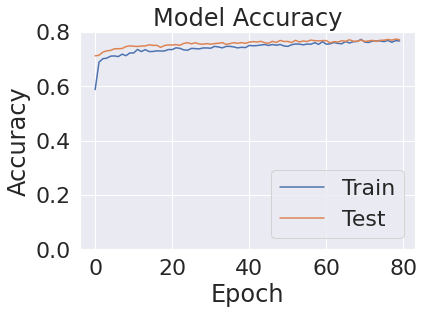

In [50]:
# Visualisasi akurasi untuk training and testing
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0, 1, step=0.2))
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'lower right')
plt.show()

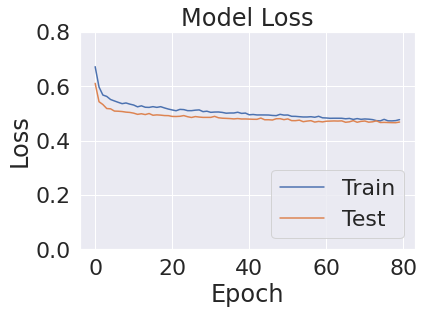

In [51]:
# Visualisasi loss untuk training and testing
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.yticks(np.arange(0, 1, step=0.2))
plt.xlabel('Epoch')
plt.legend(['Train','Test'], loc = 'lower right')
plt.show()

In [52]:
# # Pembuatan fungsi untuk evaluasi confusion matrix
# def plot_confusion_matrix(cm, classes,
#                           normalize=False,
#                           title='Confusion matrix',
#                           cmap=plt.cm.Blues):

#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)
#     plt.figure(figsize=(5,4))
#     plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.title(title)
#     plt.colorbar()
#     tick_marks = np.arange(len(classes))
#     plt.xticks(tick_marks, classes, rotation=45)
#     plt.yticks(tick_marks, classes)

#     fmt = '.2f' if normalize else 'd'
#     thresh = cm.max() / 2.
#     for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
#         plt.text(j, i, format(cm[i, j], fmt),
#                  horizontalalignment="center",
#                  color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
#     plt.ylabel('True label')
#     plt.xlabel('Predicted label')

In [53]:
# # Menampilkan confusion matrix
# fbeta_score(y_test, y_pred_trans, average='weighted', beta=0.5)
# cm_matrix = confusion_matrix(y_test, y_pred_trans)
# plt.figure()
# plot_confusion_matrix(cm_matrix, classes=['Not Join','Join'], normalize= False, title='Confusion matrix')

Text(0.5, 2.5, 'Predicted label')

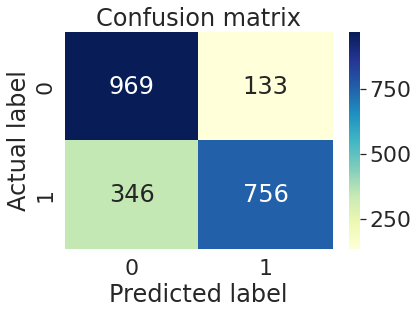

In [55]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_trans)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [56]:
print(classification_report(y_test, y_pred_trans))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80      1102
           1       0.85      0.69      0.76      1102

    accuracy                           0.78      2204
   macro avg       0.79      0.78      0.78      2204
weighted avg       0.79      0.78      0.78      2204



In [57]:
# Memanggil metrik evaluasi dari model
metrics = ['accuracy', 'precision', 'recall', 'tp', 'tn', 'fp', 'fn']
metric_val = [history.history[f][-1] for f in metrics]
print('True Positive: {}'.format(metric_val[3]))
print('True Negative: {}'.format(metric_val[4]))
print('False Positive: {}'.format(metric_val[5]))
print('False Negative: {}'.format(metric_val[6]))

True Positive: 2262.0
True Negative: 2466.0
False Positive: 625.0
False Negative: 816.0


In [58]:
# ROC AUC
roc_auc_ann = roc_auc_score(y_test, y_predicted)
roc_auc_ann_train = roc_auc_score(y_train, y_predicted_train)
print(roc_auc_ann)
# PR AUC (Average Precision)
pr_auc_ann = average_precision_score(y_test, y_predicted)
pr_auc_ann_train = average_precision_score(y_train, y_predicted_train)
print(pr_auc_ann)

0.8552825089508928
0.8727544879400635


# Evaluation

In [59]:
# Evaluasi model machine learning dan deep learning
model_ev = pd.DataFrame({'Model': ['KNN', 'SVC', 'GB', 'ANN'],
                         'Accuracy': [accuracy_knn, accuracy_svc, accuracy_gb, metric_val[0]],
                         'Precision': [precision_knn, precision_svc, precision_gb, metric_val[1]],
                         'Recall': [recall_knn, recall_svc, recall_gb, metric_val[2]],
                         'ROC AUC': [roc_auc_knn, roc_auc_svc, roc_auc_gb, roc_auc_ann],
                         'PR AUC': [pr_auc_knn, pr_auc_svc, pr_auc_gb, pr_auc_ann]
                         })
model_ev

,Model,Accuracy,Precision,Recall,ROC AUC,PR AUC
0,KNN,0.771325,0.827133,0.686025,0.771325,0.724422
1,SVC,0.777223,0.828848,0.698730,0.777223,0.729776
2,GB,0.801724,0.832833,0.754991,0.801724,0.751286
3,ANN,0.766413,0.783512,0.734893,0.855283,0.872754


In [60]:
# Testing input data baru
doj_extended = 1 #@param [0, 1]{type:"raw"}
duration_to_accept_the_offer = 15 #@param {type:"number"}
notice_period = 30 #@param {type:"number"}
offered_band = 2 #@param [0, 1, 2, 3]{type:"raw"}
percent_hike_expected_in_ctc = 45 #@param {type:"number"}
percent_hike_offered_in_ctc = 60 #@param {type:"number"}
percent_difference_ctc = 15 #@param {type:"number"}
joining_bonus = 0 #@param [0, 1]{type:"raw"}
candidate_relocate_actual = 0 #@param [0, 1]{type:"raw"}
gender = 1 #@param [0, 1]{type:"raw"}
candidate_source = 2 #@param [0, 1, 2]{type:"raw"}
rex_in_yrs = 8 #@param {type:"slider", min:0, max:24, step:1}
lob = 4 #@param [0, 1, 2, 3, 4, 5, 6, 7, 8]{type:"raw"}
location = 6 #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]{type:"raw"}
usia = 30 #@param {type:"slider", min:20, max:60, step:1}

# data baru yang diinput harus di-standardization terlebih dahulu
data_baru = [[doj_extended, duration_to_accept_the_offer, notice_period, offered_band, percent_hike_expected_in_ctc,
              percent_hike_offered_in_ctc, percent_difference_ctc, joining_bonus, candidate_relocate_actual,
              gender, candidate_source, rex_in_yrs, lob, location, usia]]
data_baru = scaler.transform(data_baru)

# prediksi data baru, yang sudah di-standardization, menggunakan model ANN
hasil_prediksi = model_ann.predict(data_baru)
hasil_prediksi = int(hasil_prediksi)

# probabilitas prediksi
nilai_kepercayaan = model_ann.predict(data_baru).flatten()
nilai_kepercayaan = max(nilai_kepercayaan) * 100
nilai_kepercayaan = round(nilai_kepercayaan)

# hasil prediksi
print(f'Calon kandidat karyawan tersebut diprediksi {nilai_kepercayaan}% ', end='')
if hasil_prediksi == 0:
  print('akan bergabung!')
elif hasil_prediksi == 1:
  print('tidak bergabung!')

1/1 [==============================] - 0s 18ms/step
Calon kandidat karyawan tersebut diprediksi 76% akan bergabung!


# Save Model

In [61]:
pickle.dump(scaler, open('scaler_ds.pkl', 'wb'))
model_ann.save('model_ds.h5', history)
print("Model berhasil disimpan!")

Model berhasil disimpan!
